In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)


X_train shape : (60000, 28, 28)
y_train shape : (60000,)


In [ ]:
print('X_test shape :', X_test.shape)
print('y_test shape :', y_test.shape)

X_test shape : (10000, 28, 28)
y_test shape : (10000,)


<Figure size 640x480 with 0 Axes>

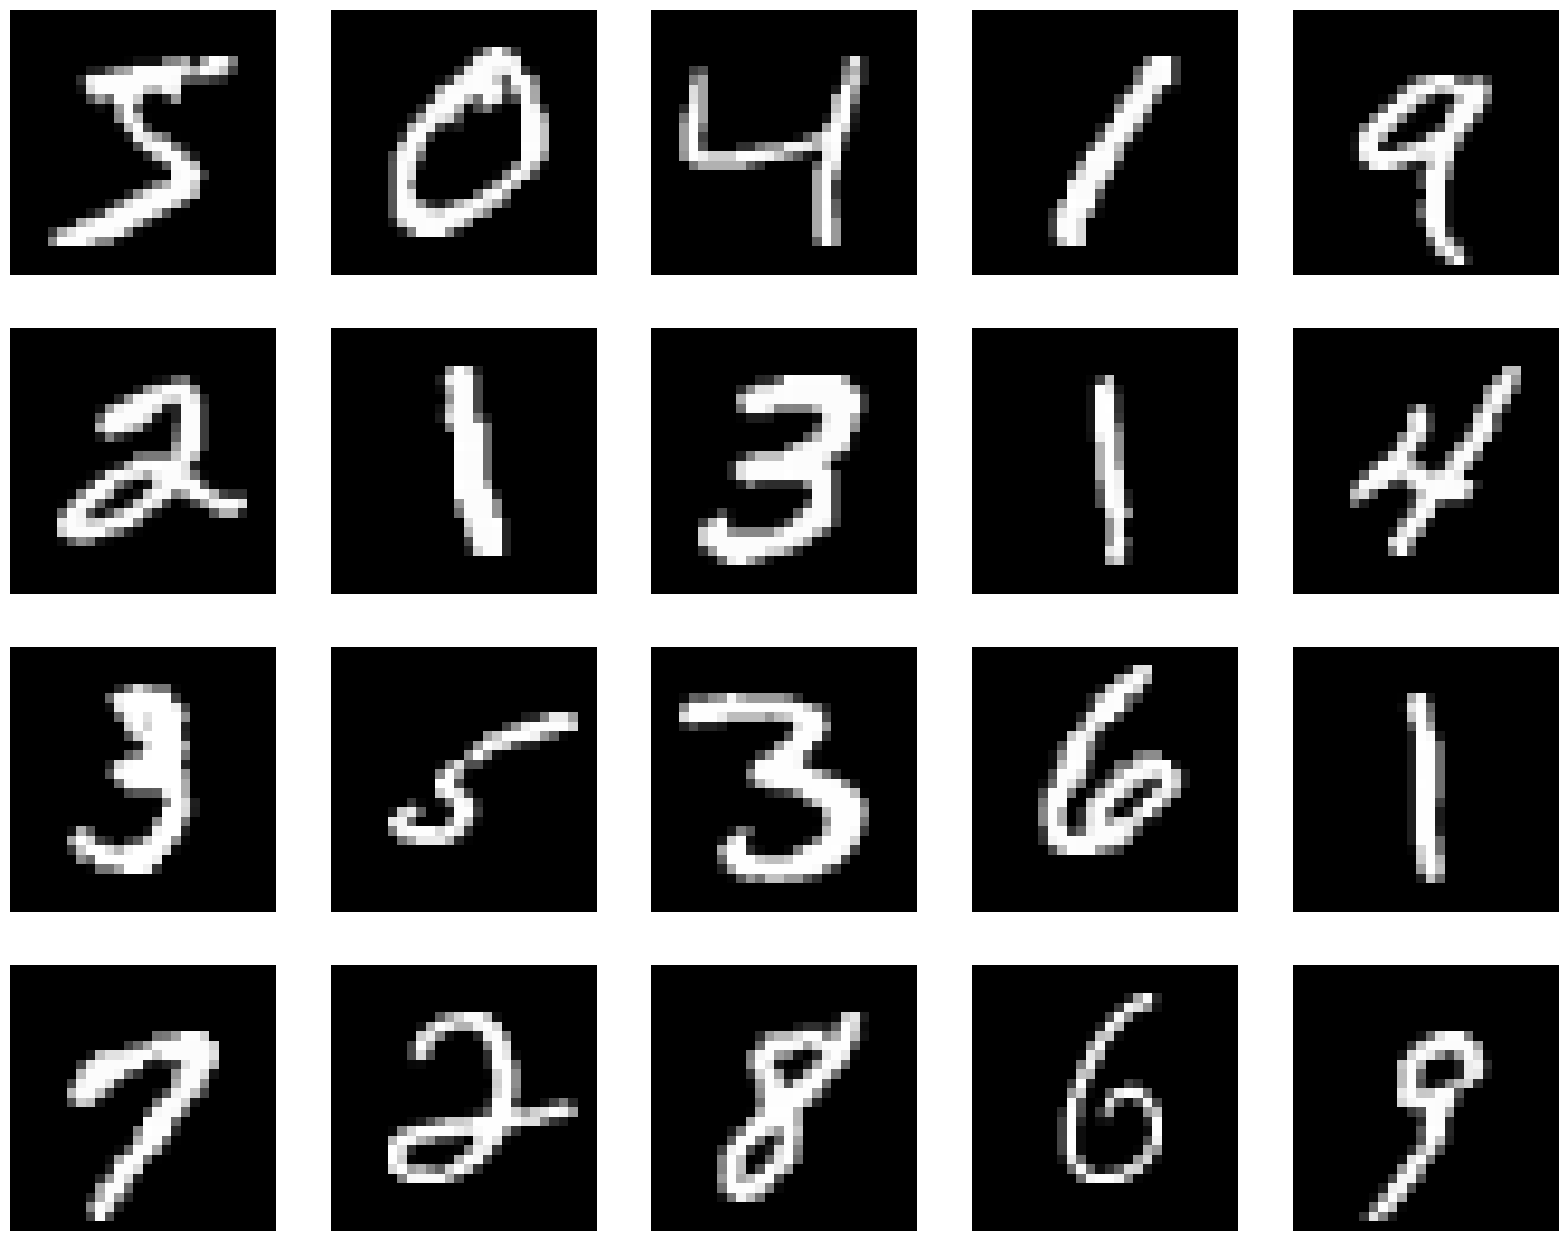

In [ ]:
plt.gray()
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.2)
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i])
  plt.axis('off')

plt.show()


# Preprocess data

In [ ]:
# Add padding and after reshape, so It can hold the requirement the LeNet-5 model desires which input example shape is (32, 32, 1)
x_train = np.pad(X_train, ((0, 0), (2, 2), (2, 2)))
x_test = np.pad(X_test, ((0, 0), (2, 2), (2, 2)))

In [ ]:
x_train.shape

(60000, 32, 32)

In [ ]:
x_train= x_train.reshape(-1, 32, 32, 1)
x_test = x_test.reshape(-1, 32, 32, 1)

x_train=x_train/255.0
x_test=x_test/255.0

#One-hot encoding

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#Build Model and Train

In [ ]:
#1.LeNet_5 architectura
model=tf.keras.Sequential()

#2.Convolutional Layer as C1
model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(32, 32, 1)))

#3.Pooling Layer as P2
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2)))

#4.Convolutional Layer as C3
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

#5.Pooling Layer as P4
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2)))

#6.Convolution Layer as C5
# model.add(tf.keras.layers.Conv2D(filters=120,strides=(1,1),kernel_size=(5,5)))

#7.Flatten Layers as F5
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(120, activation='relu'))

#8.Dense Layer as D6
model.add(tf.keras.layers.Dense(84,activation='tanh'))

#9.Dense Layers as D7
model.add(tf.keras.layers.Dense(10,activation='Softmax'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_4 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 120)              

In [ ]:
callback=[
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint('best-weights.h5',monitor='val_loss',save_best_only=True)
]

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.1995 - accuracy: 0.9402 - val_loss: 0.0731 - val_accuracy: 0.9774
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0651 - accuracy: 0.9803 - val_loss: 0.0526 - val_accuracy: 0.9831
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0449 - accuracy: 0.9858 - val_loss: 0.0398 - val_accuracy: 0.9879
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0360 - accuracy: 0.9887 - val_loss: 0.0307 - val_accuracy: 0.9902
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.0303 - val_accuracy: 0.9906
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0234 - accuracy: 0.9925 - val_loss: 0.0325 - val_accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0196 - accuracy: 0.9934 - val_loss: 0.0257 -

In [ ]:
model.evaluate(x_test)

313/313 [==============================] - 0s 797us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

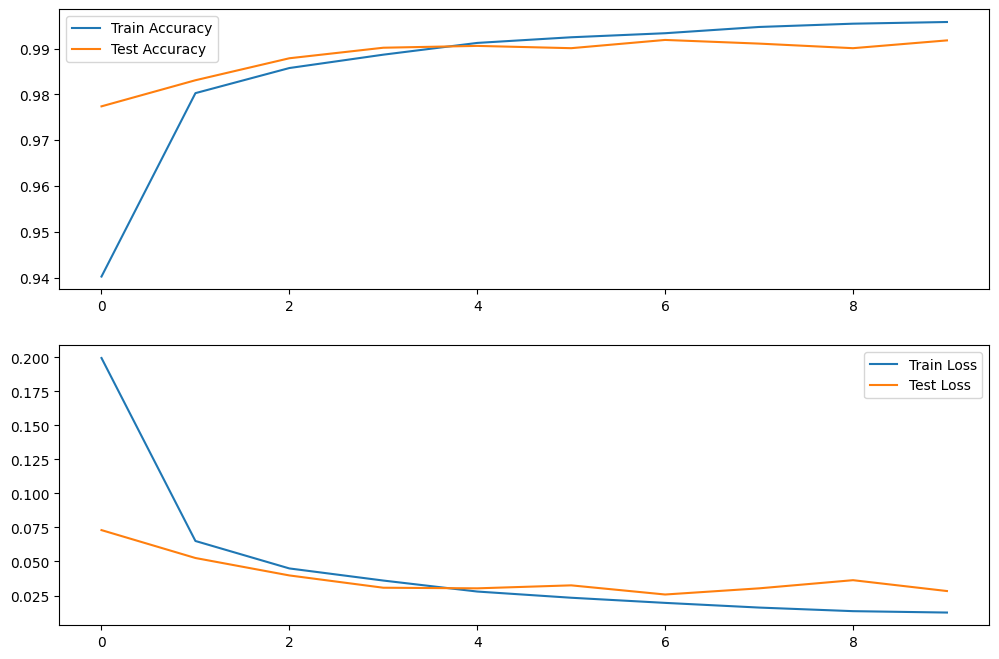

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Test Accuracy')

ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Test Loss')

ax[0].legend()
ax[1].legend()

1/1 [==============================] - 0s 16ms/step


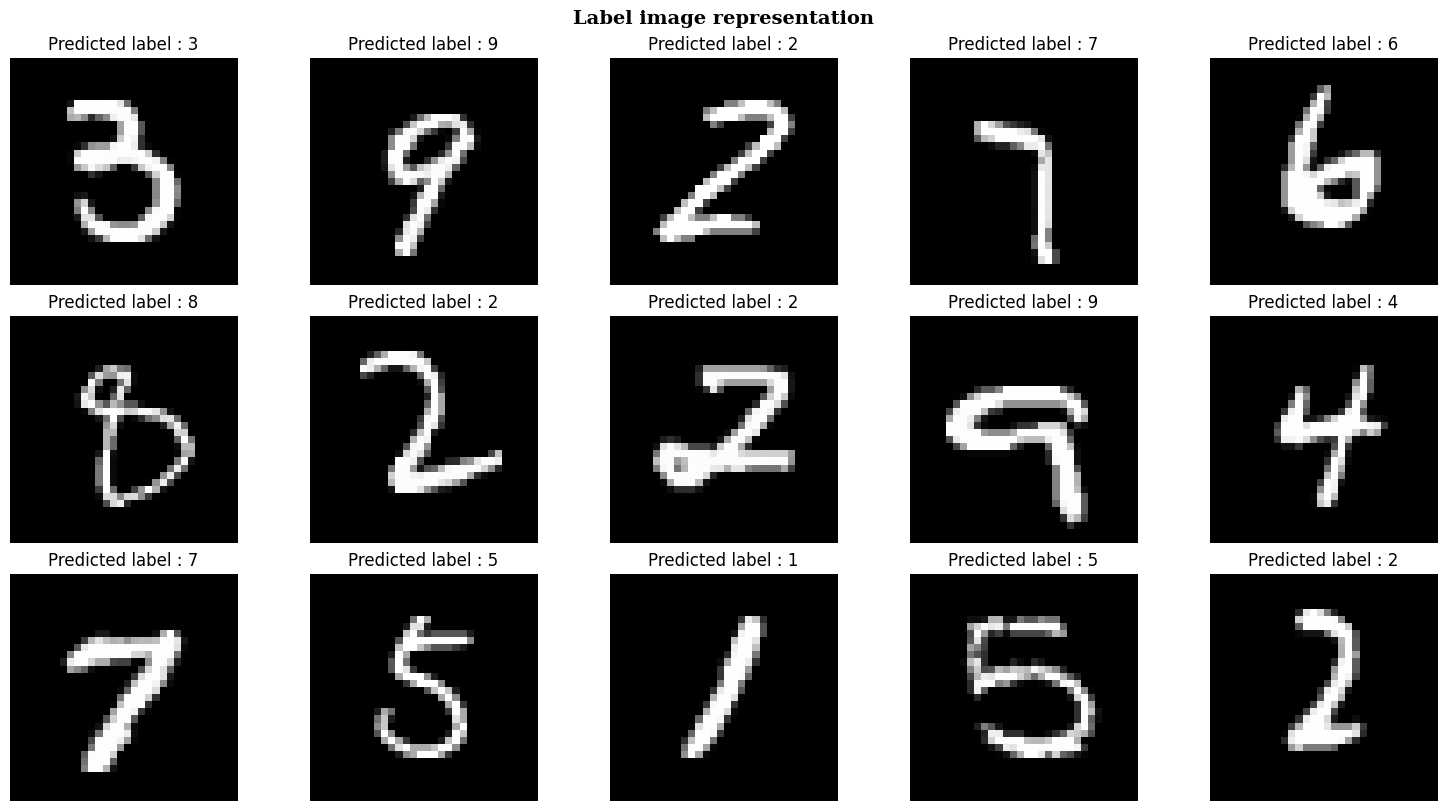

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(15, 8), constrained_layout=True)

fig.suptitle('Label image representation', fontsize=14, fontweight='bold', fontfamily='serif')

for ax in axs.flatten():
    rnd_number = np.random.randint(low=0, high=len(X_test))
    _trained_sample = x_test[rnd_number].reshape(-1, 32, 32, 1)

    prediction_vect = model.predict(_trained_sample)
    prediction_label = tf.argmax(prediction_vect, axis=1).numpy()[0]

    ax.imshow(x_test[rnd_number])

    ax.set_title(f'Predicted label : {prediction_label}')


    ax.set_axis_off()

In [ ]:
import cv2
import os
dir_name='image'
collections=[]
for img_path in os.listdir(dir_name):
  img=cv2.imread(os.path.join(dir_name,img_path), 0)
  resize_img=cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)
  collections.append(resize_img)

1/1 [==============================] - 0s 14ms/step


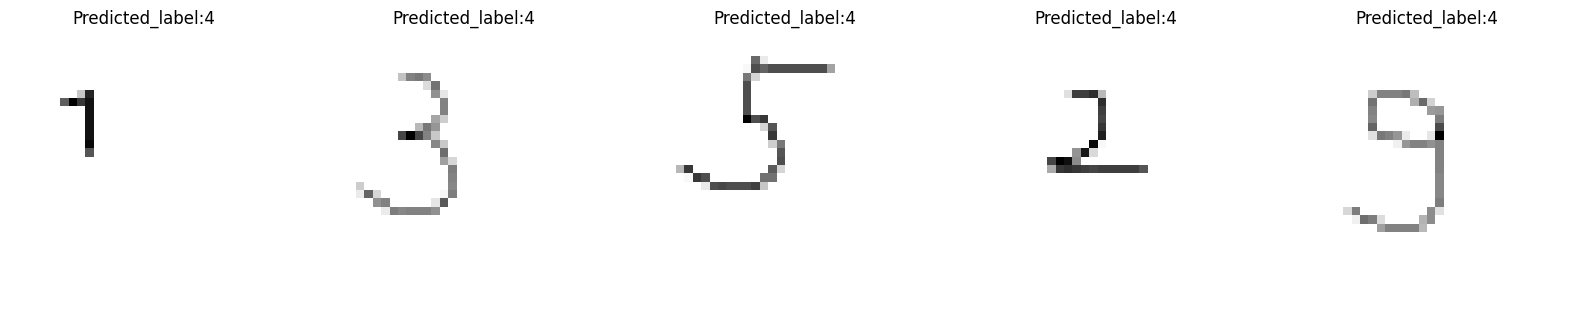

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
fig,axs=plt.subplots(nrows=1,ncols=5,figsize=(20,10))
for i,ax in enumerate(axs.flatten()):
  image=collections[i].reshape(1,32,32,1)/255.0

  predicted_vect=model.predict(image)
  predicted_label=tf.argmax(predicted_vect,axis=1).numpy()[0]

  ax.imshow(collections[i],cmap='gray')
  ax.set_title('Predicted_label:{}'.format(predicted_label))
  ax.set_axis_off()

plt.show()

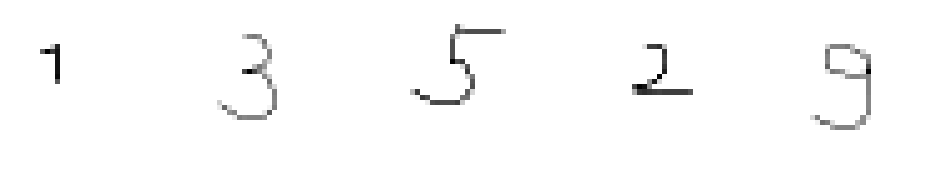

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
fig,axs=plt.subplots(nrows=1,ncols=5,figsize=(12,5))
for i,ax in enumerate(axs.flatten()):
  ax.imshow(collections[i],cmap='gray')

  ax.set_axis_off()




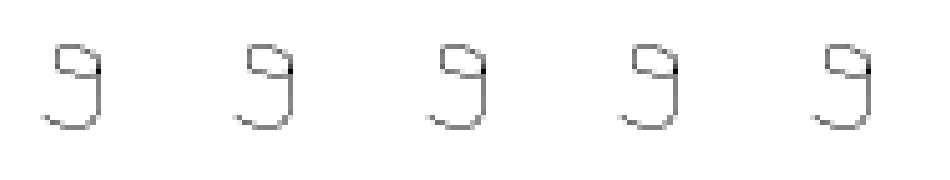

In [ ]:
fig,axs=plt.subplots(nrows=1,ncols=5,figsize=(12,5))
for i,ax in enumerate(axs.flatten()):
  collections[i]=resize_img
  ax.imshow(resize_img,cmap='gray')


  ax.set_axis_off()